# Most Suitable Crop Prediction

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv file
data=pd.read_csv('cpdata.csv')
print(data.head(1))

   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice


In [3]:
data.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


(array([  36.,  145.,  561., 1093.,  790.,  220.,   46.,   73.,   42.,
          94.]),
 array([ 8.82567475, 13.44178325, 18.05789175, 22.67400026, 27.29010876,
        31.90621726, 36.52232577, 41.13843427, 45.75454277, 50.37065128,
        54.98675978]),
 <a list of 10 Patch objects>)

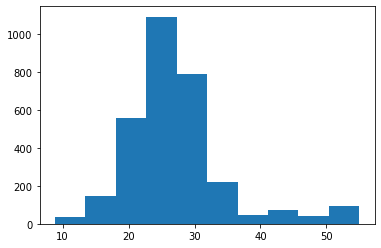

In [4]:
counts, bins = np.histogram(data.iloc[:,0])
plt.hist(bins[:-1], bins, weights=counts)

(array([303.,  97.,  22.,  82., 261., 530., 370., 444., 557., 434.]),
 array([10.0340484 , 19.02883116, 28.02361392, 37.01839668, 46.01317944,
        55.0079622 , 64.00274497, 72.99752773, 81.99231049, 90.98709325,
        99.98187601]),
 <a list of 10 Patch objects>)

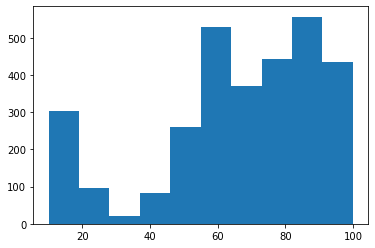

In [5]:
counts, bins = np.histogram(data.iloc[:,1])
plt.hist(bins[:-1], bins, weights=counts)

(array([  10.,  107.,  180.,  752., 1104.,  624.,  248.,   48.,   20.,
           7.]),
 array([3.50475231, 4.14778616, 4.79082   , 5.43385384, 6.07688768,
        6.71992152, 7.36295536, 8.00598921, 8.64902305, 9.29205689,
        9.93509073]),
 <a list of 10 Patch objects>)

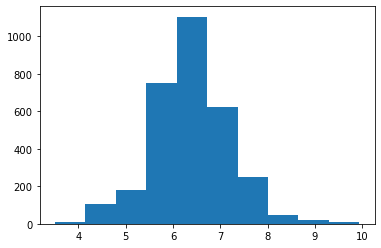

In [6]:
counts, bins = np.histogram(data.iloc[:,2])
plt.hist(bins[:-1], bins, weights=counts)

In [7]:
#Creating dummy variable for target i.e label
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head(1))
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values

The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Black gram  Chickpea  \
0    20.879744  82.002744  6.502985  202.935536           0         0   

   Coconut  Coffee  Cotton  Ground Nut  ...  maize  mango  millet  muskmelon  \
0        0       0       0           0  ...      0      0       0          0   

   orange  papaya  pomegranate  rice  watermelon  wheat  
0       0       0            0     1           0      0  

[1 rows x 34 columns]


In [8]:
#Dividing the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Importing Decision Tree classifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

In [12]:
from sklearn.metrics import accuracy_score
# Finding the accuracy of the model
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  90.53763440860216


In [13]:
import pickle
pickle.dump(clf,open('decision_tree_regression_model.pkl','wb'))

In [14]:
np.argmax(pred[0])
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
data_copy = data
data.head()

,temperature,humidity,ph,rainfall,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,...,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
0,20.879744,82.002744,6.502985,202.935536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,21.770462,80.319644,7.038096,226.655537,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,23.004459,82.320763,7.840207,263.964248,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,26.491096,80.158363,6.980401,242.864034,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20.130175,81.604873,7.628473,262.717340,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# SVM

In [17]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
#Reading the csv file
data=pd.read_csv('cpdata.csv')

# X -> features, y -> label 
X = data.iloc[:,0:4]
y = data.iloc[:,4]
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

print(accuracy)

0.863225806451613


In [18]:
svm_model_linear.predict([[26.986037,89.413849,6.260839,58.548767]])

array(['watermelon'], dtype=object)

In [19]:
import pickle
pickle.dump(svm_model_linear,open('svm_model_linear.pkl','wb'))

In [22]:
from joblib import dump, load

loaded_svm = load(open("svm_model_linear.pkl", "rb"))
loaded_svm.predict([[26.986037,89.413849,6.260839,58.548767]])[0]

'watermelon'

In [ ]:
# Neural Network

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [21]:
# load dataset
dataframe = pd.read_csv("cpdata.csv")
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [22]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [23]:
dummy_y.shape

(3100, 31)

In [24]:
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(64, input_dim=4, activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(31, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [25]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5, verbose=1)
kfold = KFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/20
1550/1550 [==============================] - 0s 296us/step - loss: 2.9093 - accuracy: 0.2819
Epoch 2/20
1550/1550 [==============================] - 0s 227us/step - loss: 1.6678 - accuracy: 0.4297
Epoch 3/20
1550/1550 [==============================] - 0s 232us/step - loss: 1.4637 - accuracy: 0.4871
Epoch 4/20
1550/1550 [==============================] - 0s 195us/step - loss: 1.3157 - accuracy: 0.5071
Epoch 5/20
1550/1550 [==============================] - 0s 206us/step - loss: 1.2308 - accuracy: 0.5361
Epoch 6/20
1550/1550 [==============================] - ETA: 0s - loss: 1.1928 - accuracy: 0.55 - 0s 224us/step - loss: 1.1796 - accuracy: 0.5581
Epoch 7/20
1550/1550 [==============================] - 0s 195us/step - loss: 1.1240 - accuracy: 0.5703
Epoch 8/20
1550/1550 [==============================] - 0s 204us/step - loss: 1.0385 - accuracy: 0.6077
Epoch 9/20
1550/1550 [==============================] - 0s 223us/step - loss: 0.9925 - accuracy: 0.6323
Epoch 10/20
1550/1550

# Input 

In [28]:
# 20.879744  82.002744  6.502985  202.935536  orange
# 26.491096	80.158363	6.980401	242.864034 orange

In [27]:
#temperature   humidity        ph    rainfall
temp = float(input('Enter temperature : '))
hum = float(input('Enter humidity : '))
ph = float(input('Enter pH : '))
rainfall = float(input('Enter rainfall : '))

crop = data_copy.columns[np.argmax(clf.predict([[temp,hum,ph,rainfall]])[0]) + 4]
print('Most beneficial Crop :', crop)

Enter temperature : 20.8


KeyboardInterrupt: Interrupted by user

# Most Beneficial Fertilizer Recommendation

In [111]:
import tensorflow as tf 
import os

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [113]:
xin = tf.placeholder('float',[None, 9])
yin = tf.placeholder('float')

# read dataset

df = pd.read_csv('fertestimate.csv') 
x = df.drop('class',1) 
y = df['class']

In [114]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [115]:

values = array(y)

# integer encode

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle='false') 

C:\Softwares\Anaconda3\envs\crop_pred\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [116]:
# neural network parameters	

n_nodes_hl1 = 64
n_nodes_hl2 = 128
n_nodes_hl3 = 64
n_classes = 4
batch_size = 100
data_index = 0

In [117]:
# generate batch 

def generate_batch(batch_size):
    global data_index
    batch = np.ndarray(shape=(batch_size, 9), dtype=np.float32)  #the same shapes as train data
    labels = np.ndarray(shape=(batch_size, 4), dtype=np.float32)
    for i in range(batch_size):
        batch[i] = np.array(x_train)[data_index]
        labels[i] = y_train[data_index]
        data_index = (data_index + 1) % len(x_train)
    return batch, labels

In [118]:
# define the model

def neural_network_model(data):
    # input data* weights + bias 
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([9, n_nodes_hl1])),
                        'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                        'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                        'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                        'biases': tf.Variable(tf.random_normal([n_classes]))}

    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']) , hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1) # rectified linear --> activation function

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']) , hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']) , hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']

    return output 

In [119]:
# train neural network

def train_neural_network(xin): 
    prediction = neural_network_model(xin) 
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=yin,logits=prediction))

    optimizer =  tf.train.AdamOptimizer(0.001).minimize(cost) #learning rate = 0.001

    hm_epochs = 20 
    eploss = []
    with tf.Session() as sess: 
        sess.run(tf.initialize_all_variables()) 

        for epoch in range(hm_epochs): 
            epoch_loss = 0 
            for _ in range(int(len(x_train)/batch_size)) : 
                epoch_x,epoch_y = generate_batch(batch_size) 
                _,c = sess.run([optimizer,cost], feed_dict={xin:epoch_x, yin:epoch_y}) 
                epoch_loss += c
            print('Epoch',epoch,'completed out of', hm_epochs, 'loss: ', epoch_loss)
            eploss.append(epoch_loss)     

        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(yin,1)) 

        accuracy = tf.reduce_mean(tf.cast(correct,'float')) 
        a = float(accuracy.eval({xin:x_test, yin:y_test}))
        print('accuracy: ', a*100,'%') 
        # predict an output

        predict = tf.argmax(prediction,1)
        example = np.array([0.05,0.01,0.01,0.01,0.02,0.01,0.03,0.01,0.01])
        example = example.reshape(-1,len(example))
        predict = predict.eval({xin:example})
        print("prediction : Fertilizer", label_encoder.inverse_transform(predict))
        
        #plot loss vs no. of epochs

        plt.figure()
        plt.subplot(2,2,1)
        plt.plot(eploss)
        plt.ylabel('Loss')
        plt.xlabel('Number of epochs')
        plt.subplot(2,2,1)
        plt.plot()
        plt.title('Loss vs Number of epochs')
        plt.ylabel('Loss')
        plt.xlabel('Number of epochs')
        plt.show()

Epoch 0 completed out of 20 loss:  1659.4805755615234
Epoch 1 completed out of 20 loss:  441.3720483779907
Epoch 2 completed out of 20 loss:  193.34368991851807
Epoch 3 completed out of 20 loss:  126.6965103149414
Epoch 4 completed out of 20 loss:  112.05246210098267
Epoch 5 completed out of 20 loss:  103.72900462150574
Epoch 6 completed out of 20 loss:  91.89268016815186
Epoch 7 completed out of 20 loss:  85.90711784362793
Epoch 8 completed out of 20 loss:  79.64293336868286
Epoch 9 completed out of 20 loss:  72.33458936214447
Epoch 10 completed out of 20 loss:  67.17194044589996
Epoch 11 completed out of 20 loss:  64.94717049598694
Epoch 12 completed out of 20 loss:  58.9133198261261
Epoch 13 completed out of 20 loss:  58.017539620399475
Epoch 14 completed out of 20 loss:  54.12311366200447
Epoch 15 completed out of 20 loss:  52.099132657051086
Epoch 16 completed out of 20 loss:  48.95827567577362
Epoch 17 completed out of 20 loss:  43.81526052951813
Epoch 18 completed out of 20 loss

C:\Softwares\Anaconda3\envs\crop_pred\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


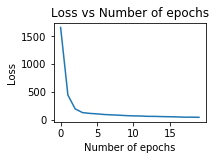

In [120]:
train_neural_network(xin)  

In [104]:
fert_data = pd.read_csv('fertestimate.csv')
y = fert_data['class']
fert_data.drop('class',1,inplace = True)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fert_data.iloc[:,:], y, test_size = 0.250)

In [109]:
from sklearn.svm import SVC


In [103]:
# creating a RF classifier
clf2 = SVC()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf2.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf2.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

ACCURACY OF THE MODEL:  0.984375
ACCURACY OF THE MODEL:  0.9796716184519155


C:\Softwares\Anaconda3\envs\crop_pred\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [110]:
import pickle
pickle.dump(clf2,open('random_forest_model.pkl','wb'))

In [122]:
clf2.predict([np.array([0.05,0.01,0.01,0.01,0.02,0.01,0.03,0.01,0.01])])[0]

2